![](../src/logo.svg)

**© Jesús López**

Ask him any doubt on **[Twitter](https://twitter.com/jsulopz)** or **[LinkedIn](https://linkedin.com/in/jsulopz)**

<a href="https://colab.research.google.com/github/jsulopz/resolving-machine-learning/blob/main/02_Decision%20Tree.%20A%20Supervised%20Classification%20Model/02_decision-tree_practice_solution.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# 02 | Decision Tree. A Supervised Classification Model

## Load the Data

Load the dataset from [CIS](https://www.cis.es/cis/opencms/ES/index.html) executing the lines of code below:
> - The goal of this dataset is
> - To predict `internet_usage` of **people** (rows)
> - Based on their **socio-demographical characteristics** (columns)

In [1]:
import pandas as pd #!

df_internet = pd.read_excel('../data/internet_usage_spain.xlsx', sheet_name=1)
df_internet

,name,internet_usage,sex,age,education
0,Josefina,0,Female,66,Elementary
1,Vicki,1,Male,72,Elementary
2,David,1,Male,48,University
3,Curtis,0,Male,59,PhD
4,Josephine,1,Female,44,PhD
...,...,...,...,...,...
2450,Frances,1,Male,43,Elementary
2451,Harry,1,Female,18,High School
2452,Adam,0,Female,54,Elementary
2453,Christine,1,Male,31,High School


## Data Preprocessing

1. The Python function to fit the model cannot process information as a string. Therefore, you need to convert **categorical variables to dummy variables**.
2. You need to check for **missing data** and drop it in case there are.

## `DecisionTreeClassifier()` Model in Python

### Fit the Model

In [4]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
model_dt = DecisionTreeClassifier(max_depth=3)

In [35]:
df_internet

,internet_usage,age,sex_Female,sex_Male,education_Elementary,education_High School,education_Higher Level,education_No studies,education_PhD,education_University,pred_dt
0,0,66,1,0,1,0,0,0,0,0,0
1,1,72,0,1,1,0,0,0,0,0,0
2,1,48,0,1,0,0,0,0,0,1,1
3,0,59,0,1,0,0,0,0,1,0,0
4,1,44,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
2450,1,43,0,1,1,0,0,0,0,0,0
2451,1,18,1,0,0,1,0,0,0,0,1
2452,0,54,1,0,1,0,0,0,0,0,0
2453,1,31,0,1,0,1,0,0,0,0,1


In [ ]:
df_internet = pd.get_dummies(data=df_internet, drop_first=True)

In [ ]:
target = df_internet.internet_usage

In [55]:
features = df_internet.drop(columns=['internet_usage','pred_dt'])

In [56]:
model_dt.fit(X=features, y=target)

DecisionTreeClassifier(max_depth=3)

### Calculate Predictions

In [57]:
model_dt.predict(X=features)

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

### Create a New DataFrame for the Predictions

In [58]:
df_internet['pred_dt'] = model_dt.predict(X=features)
df_internet[['internet_usage','pred_dt']]

,internet_usage,pred_dt
0,0,0
1,1,0
2,1,1
3,0,1
4,1,1
...,...,...
2450,1,0
2451,1,1
2452,0,0
2453,1,1


### Visualize the Model

In [59]:
from sklearn.tree import plot_tree

In [60]:
from matplotlib import pyplot as plt

In [61]:
features.columns

Index(['age', 'sex_Female', 'sex_Male', 'education_Elementary',
       'education_High School', 'education_Higher Level',
       'education_No studies', 'education_PhD', 'education_University'],
      dtype='object')

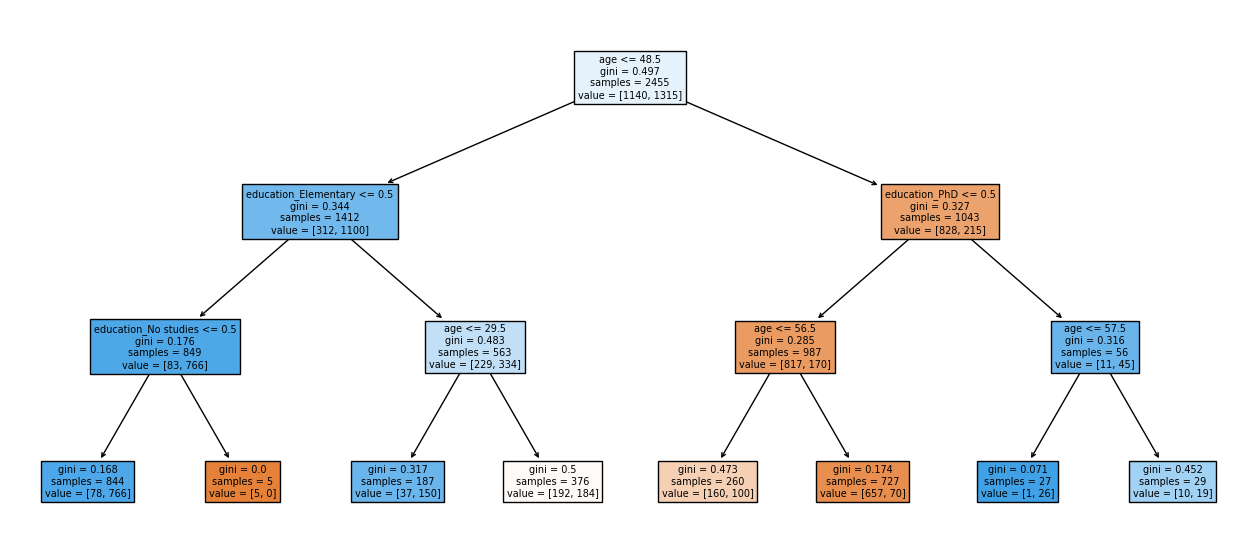

In [62]:
plt.figure(figsize=(16,7))
plot_tree(model_dt, feature_names=features.columns, filled=True);

### Model Interpretation

In [64]:
df_internet[:1]

,internet_usage,age,sex_Female,sex_Male,education_Elementary,education_High School,education_Higher Level,education_No studies,education_PhD,education_University,pred_dt
0,0,66,1,0,1,0,0,0,0,0,0


In [65]:
features[:1]

,age,sex_Female,sex_Male,education_Elementary,education_High School,education_Higher Level,education_No studies,education_PhD,education_University
0,66,1,0,1,0,0,0,0,0


In [66]:
model_dt.predict_proba(features[:1])

array([[0.90371389, 0.09628611]])

### Model's Score

In [47]:
model_dt.score(X=features,y=target)

0.859877800407332

## Confusion Matrix

In [67]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [68]:
cm = confusion_matrix(y_true=df_internet.internet_usage, y_pred=df_internet.pred_dt)

In [69]:
CM = ConfusionMatrixDisplay(cm)

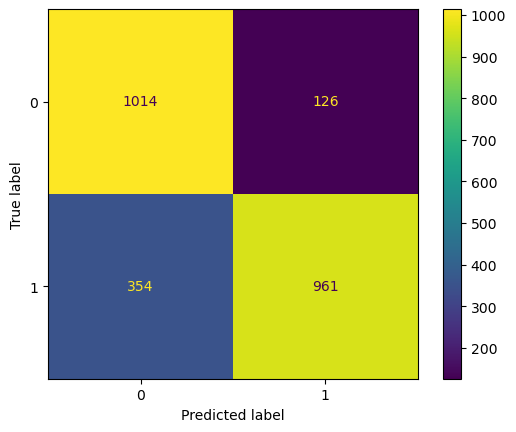

In [70]:
CM.plot()

### Classification Report

In [73]:
from sklearn.metrics import classification_report


In [77]:
report = classification_report(y_true=df_internet.internet_usage, y_pred=df_internet.pred_dt)

In [78]:
print(report)

              precision    recall  f1-score   support

           0       0.74      0.89      0.81      1140
           1       0.88      0.73      0.80      1315

    accuracy                           0.80      2455
   macro avg       0.81      0.81      0.80      2455
weighted avg       0.82      0.80      0.80      2455



### Sensitivity (Recall=1)

In [71]:
961/(961+354)

0.7307984790874524

### Specificity (Recall=0)

In [72]:
1014/(1014+126)

0.8894736842105263

### ROC Curve

In [82]:
from sklearn.metrics import RocCurveDisplay

In [83]:
auc = RocCurveDisplay()

TypeError: RocCurveDisplay.__init__() missing 2 required keyword-only arguments: 'fpr' and 'tpr'

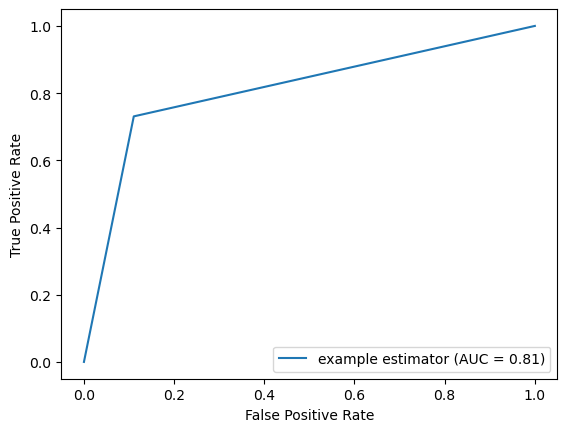

In [84]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
y = df_internet.internet_usage
pred = df_internet.pred_dt
fpr, tpr, thresholds = metrics.roc_curve(y, pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()

plt.show()

## `RandomForestClassifier()` in Python

In [85]:
from sklearn.ensemble import RandomForestClassifier

### Fit the Model

In [86]:
model_rfc = RandomForestClassifier()

In [87]:
model_rfc.fit(X=features,y=target)

RandomForestClassifier()

### Calculate Predictions

In [88]:
model_rfc.predict(X=features)

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

### Model's Score

In [89]:
model_rfc.score(X=features,y=target)

0.859877800407332

## `SVC()` in Python

### Fit the Model

In [91]:
from sklearn.svm import SVC

In [92]:
model_svc= SVC()

In [94]:
model_svc.fit(X=features,y=target)

SVC()

### Calculate Predictions

In [96]:
model_svc.predict(X=features)

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

### Model's Score

In [97]:
model_svc.score(X=features,y=target)

0.7934826883910387

## Which One Is the Best Model? Why?

In [98]:
model_dt.score(X=features,y=target)

0.8044806517311609

In [99]:
model_rfc.score(X=features,y=target)

0.859877800407332

In [100]:
model_svc.score(X=features,y=target)

0.7934826883910387

## Achieved Goals

_Double click on **this cell** and place an `X` inside the square brackets (i.e., [X]) if you think you understand the goal:_

- [ ] Understand how **the Decision Tree Algorithm** is just counting observations to determine the outcome.
- [ ] Another way to **compare real data with predictions** from the model.
- [ ] Not all model visualizations are equal.
    - A tree was visualized instead of an `scatterplot()` to interpret the model.
- [ ] Distinguish **probability's role** to optimize this type of models.
- [ ] Know how to determine **why a variable is important** in the model.
    - Why is it giving significant differences?
    - How does EDA helps us to see it?
- [ ] Understand the process of the algorithm to determine if we need to **normalize/scale** the data.

<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>.